In [5]:
# Standard Packages
from torch.utils.data import random_split, DataLoader
import torch
import wandb
from datetime import datetime
from matplotlib import pyplot as plt
import numpy as np
import torch.nn as nn
# Custom Packages
from ssapp.data.AntennaDatasetLoaders import load_serialized_dataset
import ssapp.data.AntennaDatasetLoaders as AntennaDatasets
from ssapp.Utils import train_test_data_split
from ssapp.data.Metrics import relRMSE, relRMSE_pytorch
from ssapp.models.HelperFunctions import loadModel
from ssapp.models.NeuralNetworkModels.SimpleFeedForward import FCBenchmark
##Settings
%matplotlib inline
%config InlineBackend.figure_formats = ['svg']
%load_ext autoreload
%autoreload 2


model = loadModel(FCBenchmark(3),'Simple_Feed_Forward_Patch.pt')
model.eval()


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
/zhome/5b/b/127277/Supervised-Machine-Learning-for-Space-Antenna-Performance-Prediction/models/Simple_Feed_Forward_Patch.pt


FCBenchmark(
  (regressor): Sequential(
    (0): Linear(in_features=3, out_features=2000, bias=True)
    (1): ReLU()
    (2): Linear(in_features=2000, out_features=2000, bias=True)
    (3): ReLU()
    (4): Linear(in_features=2000, out_features=2000, bias=True)
    (5): ReLU()
    (6): Linear(in_features=2000, out_features=4332, bias=True)
  )
)

In [6]:
#Verify model performance

AntennaDatasets.set_global_random_seed(42)

#dataset = load_serialized_dataset('CircularHornDataset1')

train_set = AntennaDatasets.load_serialized_dataset('PatchAntennaDataset2_Train')
val_dataset =  AntennaDatasets.load_serialized_dataset('PatchAntennaDataset2_Val')

train_dataloader = DataLoader(train_set, batch_size = len(train_set), shuffle=True)
test_dataloader = DataLoader(val_dataset, batch_size = len(val_dataset), shuffle=True)

train_params, train_fields = next(iter(train_dataloader))
test_params, test_fields = next(iter(test_dataloader))
print(train_params.shape)
train_pred = model(train_params.float())
test_pred = model(test_params.float())

print('Relative RMSE Train',relRMSE_pytorch(train_pred, train_fields).item())
print('Relative RMSE Test',relRMSE_pytorch(test_pred, test_fields).item())

torch.Size([2361, 3])
Relative RMSE Train 0.0020762051252291593
Relative RMSE Test 0.0024265502243027474


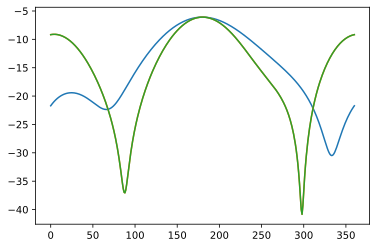

In [7]:
from ssapp.Utils import get_single_dataset_example

mag = lambda a,b: 20*np.log10(np.sqrt(a**2+b**2))
#mag = lambda a,b: (np.sqrt(a**2+b**2))
params, fields = get_single_dataset_example(val_dataset)

plt.figure()
plt.plot(mag(fields[0,:,0,0],fields[0,:,0,1]))

plt.plot(mag(fields[0,:,1,0],fields[0,:,1,1]))
plt.plot(mag(fields[0,:,1,0],fields[0,:,1,1]))

tensor([[1.7143, 7.5714, 3.1000]])


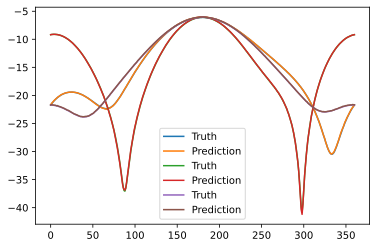

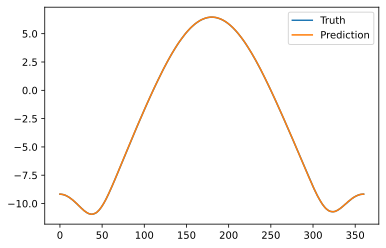

In [8]:
from ssapp.Utils import get_single_dataset_example


print(params)

pred = model(params).detach()

plt.plot(mag(fields[0,:,0,0],fields[0,:,0,1]),label = 'Truth')
plt.plot(mag(pred[0,:,0,0],pred[0,:,0,1]),label = 'Prediction')
plt.plot(mag(fields[0,:,1,0],fields[0,:,1,1]),label = 'Truth')
plt.plot(mag(pred[0,:,1,0],pred[0,:,1,1]),label = 'Prediction')
plt.plot(mag(fields[0,:,2,0],fields[0,:,2,1]),label = 'Truth')
plt.plot(mag(pred[0,:,2,0],pred[0,:,2,1]),label = 'Prediction')
plt.legend()
plt.figure()
plt.plot(mag(fields[0,:,0,2],fields[0,:,0,3]),label = 'Truth')
plt.plot(mag(pred[0,:,0,2],pred[0,:,0,3]),label = 'Prediction')
plt.legend()